In [1]:
from pylab import *
%matplotlib inline

# Segundo metodo

$$
y_{n+1} = y_n + hf + \frac{h^2}{2} \left(\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} f \right)
$$

In [2]:
def segundo_orden1(ec_diff,p_ini,t_final,ec_jac,h=0.1):
    tiempo=arange(0,t_final+h,h)
    y = [0]*len(tiempo)
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + ec_diff(y[i],tiempo[i])*h  
        y[i+1] += (ec_jac(y[i],tiempo[i])[0]+ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i]))*0.5*h*h
    return tiempo,y

def euler1(ec_diff,p_ini,t_final,h=0.1):
    tiempo=arange(0,t_final+h,h)
    y = [0]*len(tiempo)
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + ec_diff(y[i],tiempo[i])*h
    return tiempo,y

In [3]:
def funcion(y,x):
    return x*sin(y)

def parciales(y,x):
    return sin(y),x*cos(y)

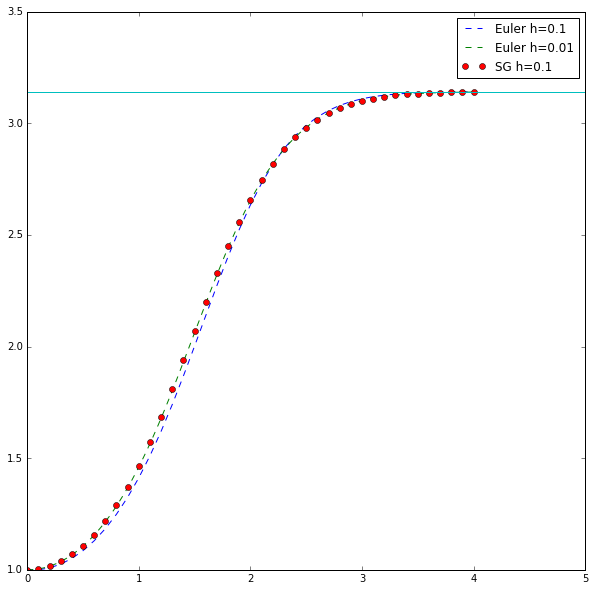

In [4]:
y_euler=euler1(funcion,1,4)
y_euler1=euler1(funcion,1,4,0.01)
figure(figsize=(10,10),dpi=100)
plot(y_euler[0],y_euler[1],'--',label='Euler h=0.1')
plot(y_euler1[0],y_euler1[1],'--',label='Euler h=0.01')
sol=segundo_orden1(funcion,1,4,parciales)
plot(sol[0],sol[1],'o',label='SG h=0.1')
plot([0,5],[pi,pi])
legend()
show()